In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical


In [8]:
# Load the dataset
file_paths = [
    'Monday-WorkingHours.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday-workingHours.pcap_ISCX.csv',
    'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
]

# Combine all datasets into one DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())


    Destination Port   Flow Duration   Total Fwd Packets  \
0              49188               4                   2   
1              49188               1                   2   
2              49188               1                   2   
3              49188               1                   2   
4              49486               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        0                           12   
2                        0                           12   
3                        0                           12   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             0                       6   
2                             0                       6   
3                             0                 

In [10]:
# Print all column names to check for leading/trailing spaces
print(combined_df.columns.tolist())


[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

In [11]:
# Remove leading spaces from all column names
combined_df.columns = combined_df.columns.str.strip()

# Print the updated column names to verify
print(combined_df.columns.tolist())


['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [12]:
# Check the distribution of classes in the 'Label' column
if 'Label' in combined_df.columns:
    print(combined_df['Label'].value_counts())
else:
    print("The 'Label' column does not exist in the DataFrame.")


Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical


In [15]:
# Check for null values
print(combined_df.isnull().sum())


Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64


In [16]:
# Remove leading and trailing spaces from column names (if not done yet)
combined_df.columns = combined_df.columns.str.strip()

# Proceed with Label Encoding on the 'Label' column
le = LabelEncoder()
combined_df['Label'] = le.fit_transform(combined_df['Label'])

# Print the unique classes (for reference)
print("Classes found and their encoding:")
print(dict(zip(le.classes_, le.transform(le.classes_))))


Classes found and their encoding:
{'BENIGN': 0, 'Bot': 1, 'DDoS': 2, 'DoS GoldenEye': 3, 'DoS Hulk': 4, 'DoS Slowhttptest': 5, 'DoS slowloris': 6, 'FTP-Patator': 7, 'Heartbleed': 8, 'Infiltration': 9, 'PortScan': 10, 'SSH-Patator': 11, 'Web Attack � Brute Force': 12, 'Web Attack � Sql Injection': 13, 'Web Attack � XSS': 14}


In [18]:
# Select features and labels
X = combined_df.drop('Label', axis=1)
y = combined_df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


In [21]:
import numpy as np

# Check for NaN values
nan_counts = np.isnan(X).sum()
print(f"Number of NaN values in each feature:\n{nan_counts}")

# Check for infinite values
inf_counts = np.isinf(X).sum()
print(f"Number of Infinite values in each feature:\n{inf_counts}")


Number of NaN values in each feature:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64
Number of Infinite values in each feature:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64


In [22]:
# Replace infinite values with NaN
X[np.isinf(X)] = np.nan

# Option 1: Drop rows with NaN values
X = X.dropna()

# Option 2: Fill NaN values with the mean of each column
# X = X.fillna(X.mean())

# Check again for NaNs and infinite values
nan_counts = np.isnan(X).sum()
inf_counts = np.isinf(X).sum()
print(f"After handling, number of NaN values in each feature:\n{nan_counts}")
print(f"After handling, number of Infinite values in each feature:\n{inf_counts}")


After handling, number of NaN values in each feature:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64
After handling, number of Infinite values in each feature:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64


In [24]:
# After scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the shape of the scaled data
print(f"Shape of X_scaled: {X_scaled.shape}")

# Reshape the scaled data for LSTM [samples, time steps, features]
X_scaled_train = X_scaled.reshape(-1, 1, X_scaled.shape[1])  # -1 infers the number of samples
X_scaled_test = X_scaled.reshape(-1, 1, X_scaled.shape[1])   # Same for test data

print(f"Shape of X_scaled_train: {X_scaled_train.shape}")
print(f"Shape of X_scaled_test: {X_scaled_test.shape}")


Shape of X_scaled: (2827876, 78)
Shape of X_scaled_train: (2827876, 1, 78)
Shape of X_scaled_test: (2827876, 1, 78)


In [25]:
# Check the data type and range of values in the scaled data
print(f"Data type of X_scaled: {X_scaled.dtype}")
print(f"Min and Max values in scaled data: {X_scaled.min()}, {X_scaled.max()}")


Data type of X_scaled: float64
Min and Max values in scaled data: -1529.2887068087084, 1290.1208466043822


In [26]:
# Check for outliers in the original dataset
print(X.describe())  # Get statistical details


       Destination Port  Flow Duration  Total Fwd Packets  \
count      2.827876e+06   2.827876e+06       2.827876e+06   
mean       8.061534e+03   1.480065e+07       9.368972e+00   
std        1.827432e+04   3.366750e+07       7.500527e+02   
min        0.000000e+00  -1.300000e+01       1.000000e+00   
25%        5.300000e+01   1.550000e+02       2.000000e+00   
50%        8.000000e+01   3.133800e+04       2.000000e+00   
75%        4.430000e+02   3.239368e+06       5.000000e+00   
max        6.553500e+04   1.200000e+08       2.197590e+05   

       Total Backward Packets  Total Length of Fwd Packets  \
count            2.827876e+06                 2.827876e+06   
mean             1.040396e+01                 5.498522e+02   
std              9.978937e+02                 9.998639e+03   
min              0.000000e+00                 0.000000e+00   
25%              1.000000e+00                 1.200000e+01   
50%              2.000000e+00                 6.200000e+01   
75%             

In [31]:
# Remove or set negative Flow Duration to 0
X = X[X['Flow Duration'] >= 0]  # Remove rows with negative Flow Duration


In [32]:
# Check for negative values in the entire DataFrame
negative_values = X[X < 0].count()
print("Negative values in each feature:\n", negative_values)


Negative values in each feature:
 Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64


In [33]:
# Function to remove outliers based on IQR
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Remove outliers for key features
X = remove_outliers(X, 'Flow Duration')
X = remove_outliers(X, 'Total Length of Fwd Packets')  # Repeat for other features as necessary


In [34]:
from sklearn.preprocessing import RobustScaler

# Scale the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


In [35]:
print(f"Min and Max values in scaled data: {X_scaled.min()}, {X_scaled.max()}")


Min and Max values in scaled data: -53687067.6, 144191.0935


In [36]:
# Get the descriptive statistics for the original features
feature_statistics = X.describe()
print(feature_statistics)


       Destination Port  Flow Duration  Total Fwd Packets  \
count      1.787351e+06   1.787351e+06       1.787351e+06   
mean       1.094422e+04   2.049024e+04       1.776514e+00   
std        2.058963e+04   3.576860e+04       9.422687e-01   
min        0.000000e+00   1.000000e+00       1.000000e+00   
25%        5.300000e+01   5.600000e+01       1.000000e+00   
50%        7.900000e+01   2.090000e+02       2.000000e+00   
75%        5.298000e+03   3.091700e+04       2.000000e+00   
max        6.553500e+04   2.044340e+05       6.600000e+01   

       Total Backward Packets  Total Length of Fwd Packets  \
count            1.787351e+06                 1.787351e+06   
mean             1.281514e+00                 4.166485e+01   
std              1.128924e+00                 3.983294e+01   
min              0.000000e+00                 0.000000e+00   
25%              1.000000e+00                 2.000000e+00   
50%              1.000000e+00                 4.300000e+01   
75%             

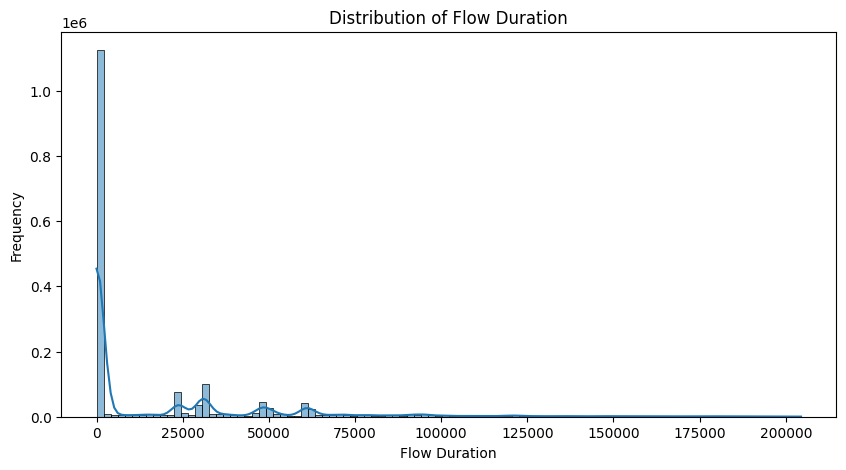

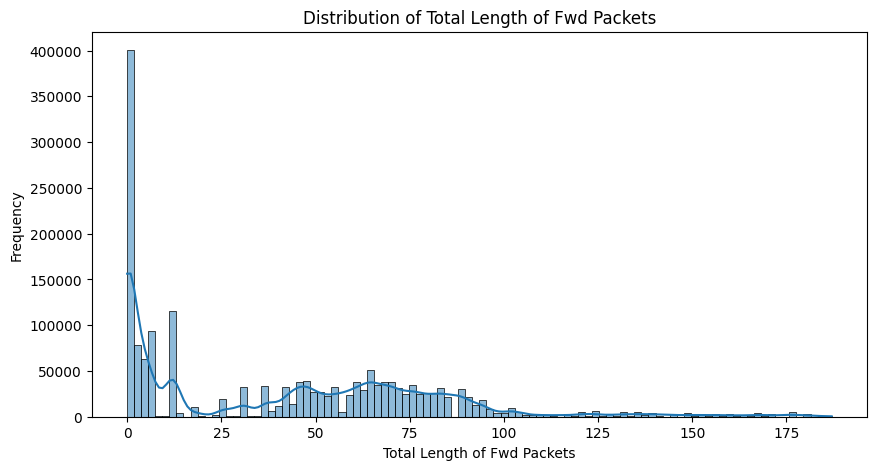

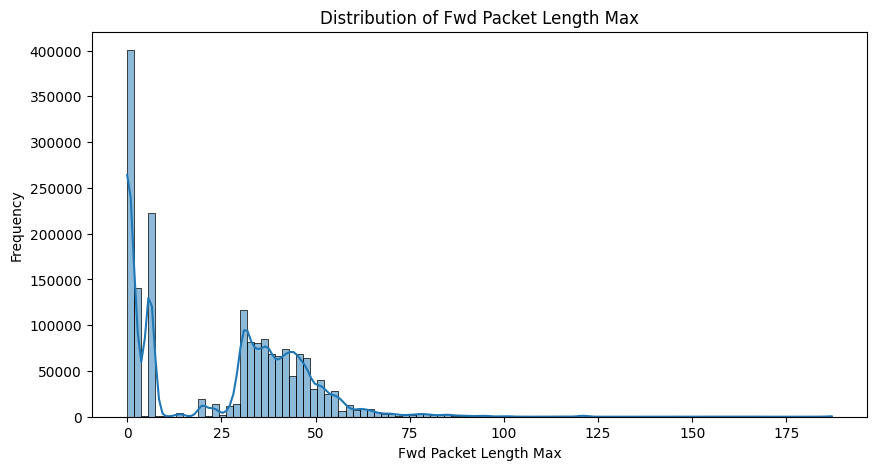

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for selected features
features_to_plot = ['Flow Duration', 'Total Length of Fwd Packets', 'Fwd Packet Length Max']  # Add other features as necessary
for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.histplot(X[feature], bins=100, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [38]:
from sklearn.preprocessing import MinMaxScaler

# Try MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Check min and max again
print(f"Min and Max values in scaled data: {X_scaled.min()}, {X_scaled.max()}")


Min and Max values in scaled data: 0.0, 1.0


In [39]:
# Reshape the scaled data for LSTM [samples, time steps, features]
X_scaled_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])
print(X_scaled_reshaped.shape)  # This should give you (num_samples, 1, num_features)


(1787351, 1, 78)


In [45]:
print("Available columns in DataFrame:")
print(df.columns.tolist())


Available columns in DataFrame:
[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count'

In [47]:
# Step 1: Check for NaN or Infinite values in X
print("Checking for NaN values in X:")
print(X.isna().sum())  # Count NaN values in each column
print("Checking for Infinite values in X:")
print(np.isinf(X).sum())  # Count Infinite values in each column

# Step 2: Handle NaN values
# Option 1: Remove rows with NaN or Infinite values
X_cleaned = X[~X.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

# Option 2: Alternatively, fill NaN values with the mean or median
# X.fillna(X.mean(), inplace=True)  # Uncomment this line to use mean

# Step 3: Scale features using the cleaned data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Step 4: One-hot encode the labels (make sure y corresponds to X_cleaned)
y_cleaned = y[X.index.isin(X_cleaned.index)]  # Align y with cleaned X

# Step 5: One-hot encode the labels
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y_cleaned.values.reshape(-1, 1))

# Step 6: Reshape X for LSTM if necessary
X_scaled_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Step 7: Check the shapes
print("Shape of X_scaled_reshaped:", X_scaled_reshaped.shape)
print("Shape of y_encoded:", y_encoded.shape)

# Step 8: Split the data
if X_scaled_reshaped.shape[0] == y_encoded.shape[0]:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_reshaped, y_encoded, test_size=0.2, random_state=42)
else:
    print("Mismatch in sample sizes. Please check your data preparation.")


Checking for NaN values in X:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64
Checking for Infinite values in X:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64
Shape of X_scaled_reshaped: (286096, 1, 78)
Shape of y_encoded: (286096, 2)


In [48]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_reshaped, y_encoded, test_size=0.2, random_state=42)

# Print the shapes to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (228876, 1, 78)
Shape of X_test: (57220, 1, 78)
Shape of y_train: (228876, 2)
Shape of y_test: (57220, 2)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Define the LSTM model using Input layer
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))  # Output layer for two classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        36,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,090 (191.76 KB)

 Trainable params: 49,090 (191.76 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9903 - loss: 0.0678 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 2/10
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 3/10
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 4/10
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 5/10
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9994 - val_loss: 0.0019
Epoch 6/10
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9995 - val_loss: 0.0019
Epoch 7/10
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9995 - val_loss: 0.0018
Epoch 8/10
2861/2861 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9998 - loss: 0.0012 - 

In [52]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


1789/1789 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.9998 - loss: 0.0010
Test Loss: 0.0009151882259175181
Test Accuracy: 0.9998252391815186


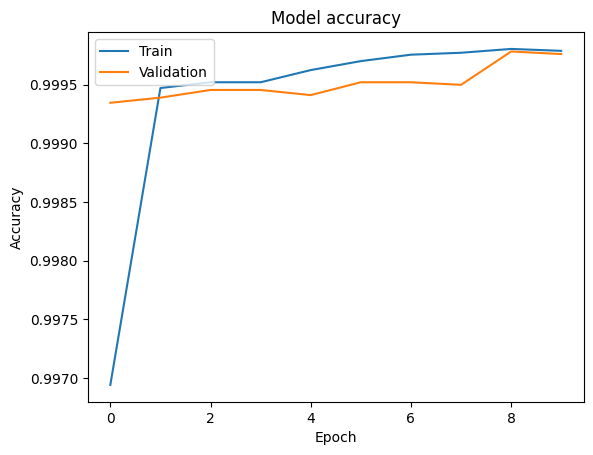

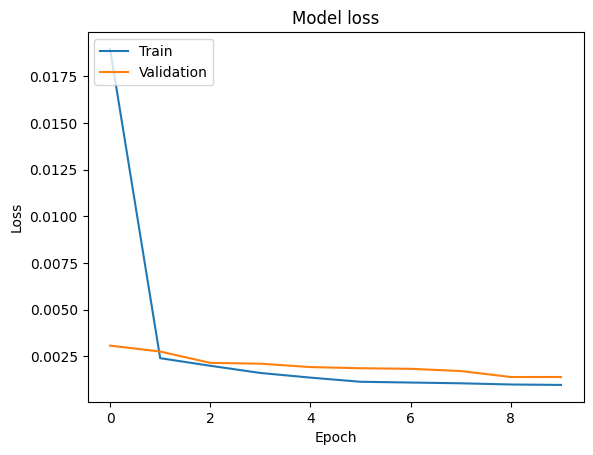

In [53]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1789/1789 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


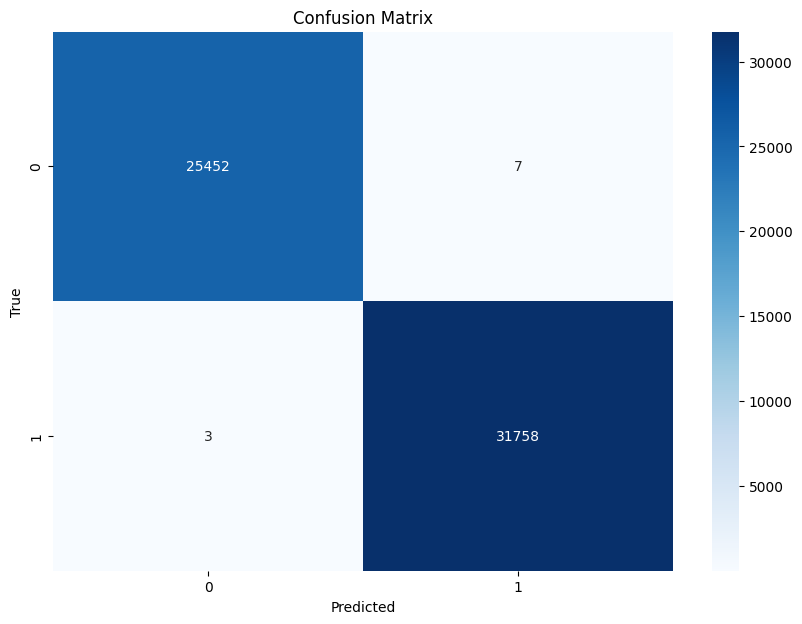

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [56]:
model.save('your_model_name.keras')


In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25459
           1       1.00      1.00      1.00     31761

    accuracy                           1.00     57220
   macro avg       1.00      1.00      1.00     57220
weighted avg       1.00      1.00      1.00     57220



In [60]:
from keras.models import load_model

# Load model without the optimizer
model = load_model('your_model_name.keras', compile=False)
